# 0. Import all the dependencies for the project

In [1]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Bring the data down
Download the data and process it with pandas

In [2]:
# The .csv is readed and putted into a DataFrame
df = pd.read_csv('data_sp.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,200.629715,91366500
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,201.823288,78744400
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,201.662872,78379000
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,202.384460,71559900
4,2017-01-09,226.910004,227.070007,226.419998,226.460007,201.716385,46939700


In [ ]:
# The column date is transformed to a datetime to make a better 
df['Date'] = pd.to_datetime(df['Date'])
df.head()

In [3]:
# Check types of date in the DataFrma
df.shape

(1711, 7)

In [ ]:
# We set the index as the date and replace the column
df.set_index('Date', inplace=True)
df.head()

# 2. Creation of the environment

In [4]:
env = gym.make('stocks-v0', df=df, frame_bound=(10, 110), window_size=10)
print("observation_space:", env.observation_space)

observation_space: Box(-10000000000.0, 10000000000.0, (10, 2), float32)


In [5]:
# Check attributes in the environment
env.__dict__

{'_saved_kwargs': {'disable_render_order_enforcing': False},
 'env': <PassiveEnvChecker<StocksEnv<stocks-v0>>>,
 '_action_space': None,
 '_observation_space': None,
 '_reward_range': None,
 '_metadata': None,
 '_cached_spec': None,
 '_has_reset': False,
 '_disable_render_order_enforcing': False}

In [6]:
# signal_features: Extracted features over time. Used to create Gym observations.
env.unwrapped.signal_features

array([[ 2.2524001e+02,  0.0000000e+00],
       [ 2.2658000e+02,  1.3399963e+00],
       [ 2.2639999e+02, -1.8000793e-01],
       [ 2.2721001e+02,  8.1001282e-01],
       [ 2.2646001e+02, -7.5000000e-01],
       [ 2.2646001e+02,  0.0000000e+00],
       [ 2.2710001e+02,  6.3999939e-01],
       [ 2.2653000e+02, -5.7000732e-01],
       [ 2.2705000e+02,  5.2000427e-01],
       [ 2.2625000e+02, -8.0000305e-01],
       [ 2.2675000e+02,  5.0000000e-01],
       [ 2.2591000e+02, -8.3999634e-01],
       [ 2.2674001e+02,  8.3000183e-01],
       [ 2.2614999e+02, -5.9001160e-01],
       [ 2.2760001e+02,  1.4500122e+00],
       [ 2.2957001e+02,  1.9700012e+00],
       [ 2.2933000e+02, -2.4000549e-01],
       [ 2.2897000e+02, -3.6000061e-01],
       [ 2.2755000e+02, -1.4199982e+00],
       [ 2.2753000e+02, -2.0004272e-02],
       [ 2.2762000e+02,  8.9996338e-02],
       [ 2.2777000e+02,  1.5000916e-01],
       [ 2.2934000e+02,  1.5699921e+00],
       [ 2.2892999e+02, -4.1000366e-01],
       [ 2.28940

# 3. Build environment

In [7]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (10, 2), float32)

info {'total_reward': 2.689971923828125, 'total_profit': 0.715555260683808, 'position': <Positions.Short: 0>} 



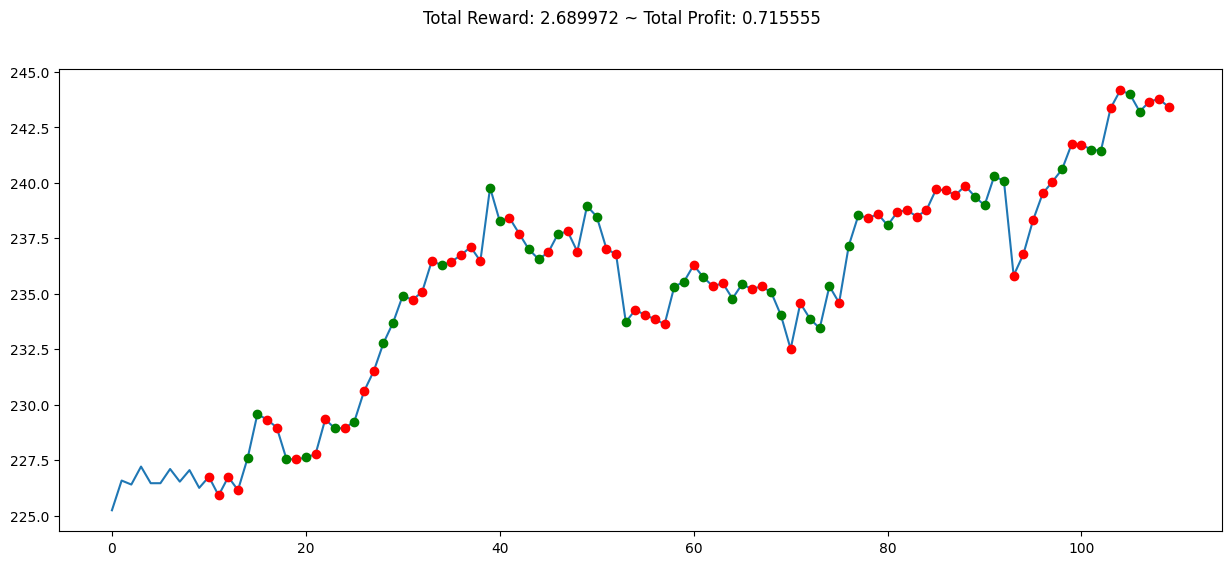

In [8]:
state = env.reset(seed=2808)
while True: 
    action = env.action_space.sample()
    n_state, reward, done, truncated, info = env.step(action)
    if done or truncated : 
        print('info', info,'\n')
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.unwrapped.render_all()
plt.show()

# 4. Train Environment

In [9]:
model = A2C('MlpPolicy', env, verbose=0) 
model.learn(total_timesteps=20000)

# 5. Test Environment

In [10]:
observation, info = env.reset()

while True:
    # action = env.action_space.sample()
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        break

env.close()

print("info:", info)

info: {'total_reward': 6.1200408935546875, 'total_profit': 0.7484254130246926, 'position': <Positions.Short: 0>}


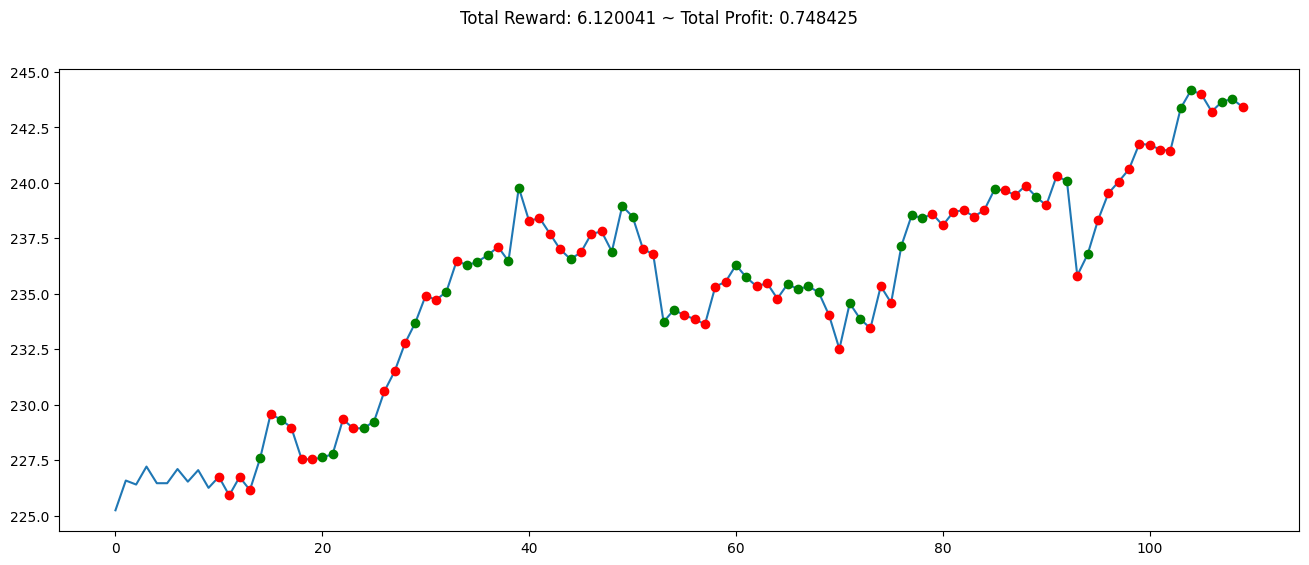

In [11]:
plt.figure(figsize=(16, 6))
env.unwrapped.render_all()
plt.show()

In [12]:
observation

array([[ 2.4171001e+02, -4.9987793e-02],
       [ 2.4150000e+02, -2.1000671e-01],
       [ 2.4144000e+02, -5.9997559e-02],
       [ 2.4336000e+02,  1.9199982e+00],
       [ 2.4417000e+02,  8.0999756e-01],
       [ 2.4399001e+02, -1.7999268e-01],
       [ 2.4321001e+02, -7.7999878e-01],
       [ 2.4366000e+02,  4.4999695e-01],
       [ 2.4378000e+02,  1.1999512e-01],
       [ 2.4341000e+02, -3.6999512e-01]], dtype=float32)